### Preprocesado de datos

In [ ]:
import pandas as pd

# Datos obtenidos de https://databank.worldbank.org/reports.aspx?source=world-development-indicators#
with open ("datos.csv", "r") as f:
    lineas = f.read().splitlines()
    rangoDeLineas = lineas[:85]

with open("preprocesado.csv", "w") as f:
    for linea in rangoDeLineas:
        f.write(linea + "\n")

#Leer datos
df = pd.read_csv("preprocesado.csv", sep =",")
#Limpieza de datos
df = df.drop(columns=["Series Code", "Country Code"], errors="ignore")
df.columns = ['País', 'Indicador', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
df

In [96]:
''' TAREAS PARA EL PROYECTO:
Un DataFrame por Indicador:
Bryan
	'Access to electricity (% of population)',
    'Adjusted net national income per capita (current US$)'
Jaime
	'Current health expenditure per capita (current US$)',
	'Employment to population ratio, 15+, total (%) (national estimate)',
Nery
	'GDP per capita (current US$)',
	'Industry (including construction), value added (% of GDP)',
Maria Jose
	'Labor force with advanced education (% of total working-age population with advanced education)',
	'Labor force, total', 
	'Life expectancy at birth, total (years)',
Karen
	'Net migration',
	'People using at least basic sanitation services (% of population)',
	'Population density (people per sq. km of land area)'

2. HACER LOS SIGUIENTES GRAFICOS PARA CADA INDICADOR:
1. Barras
2. 
'''
cantidadIndicadores = len(df['Indicador'].unique()) # cantidad de indicadores
cantidadIndicadores, df['Indicador'].unique() # imprime los indicadores

(12,
 array(['Access to electricity (% of population)',
        'Adjusted net national income per capita (current US$)',
        'Current health expenditure per capita (current US$)',
        'Employment to population ratio, 15+, total (%) (national estimate)',
        'GDP per capita (current US$)',
        'Industry (including construction), value added (% of GDP)',
        'Labor force with advanced education (% of total working-age population with advanced education)',
        'Labor force, total', 'Life expectancy at birth, total (years)',
        'Net migration',
        'People using at least basic sanitation services (% of population)',
        'Population density (people per sq. km of land area)'],
       dtype=object))

### Bryan

### Jaime

### Nery

-Indicador: GDP per capita (current US$)

Representa la cantidad de dinero que le correspondería a cada habitante del país si se repartiera a todos por igual el PIB generado en un año

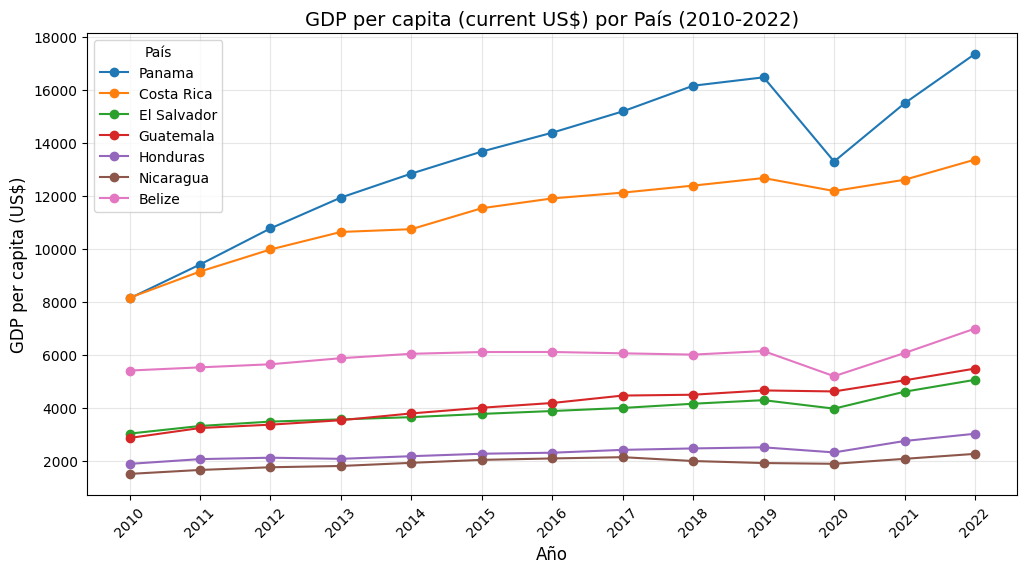

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar por un indicador específico
dfGPD = df[df['Indicador'] == "GDP per capita (current US$)"]

# Convertir columnas a numérico y calcular la media por país
dfGPD.iloc[:, 2:] = dfGPD.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
# eliminar la columna indicador
dfGPD = dfGPD.drop(columns=['Indicador'])
# elegimos la columna "País" como index y eliminamos la columna "País"
dfGPD.set_index('País', inplace=True)
#dfGPD

plt.figure(figsize=(12, 6))

for pais in dfGPD.index:
    plt.plot(dfGPD.columns, dfGPD.loc[pais], marker='o', label=pais)

plt.title('GDP per capita (current US$) por País (2010-2022)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('GDP per capita (US$)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(alpha=0.3)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_23024\4144637016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dfGPD_media.index, x=dfGPD_media.values, palette='coolwarm')


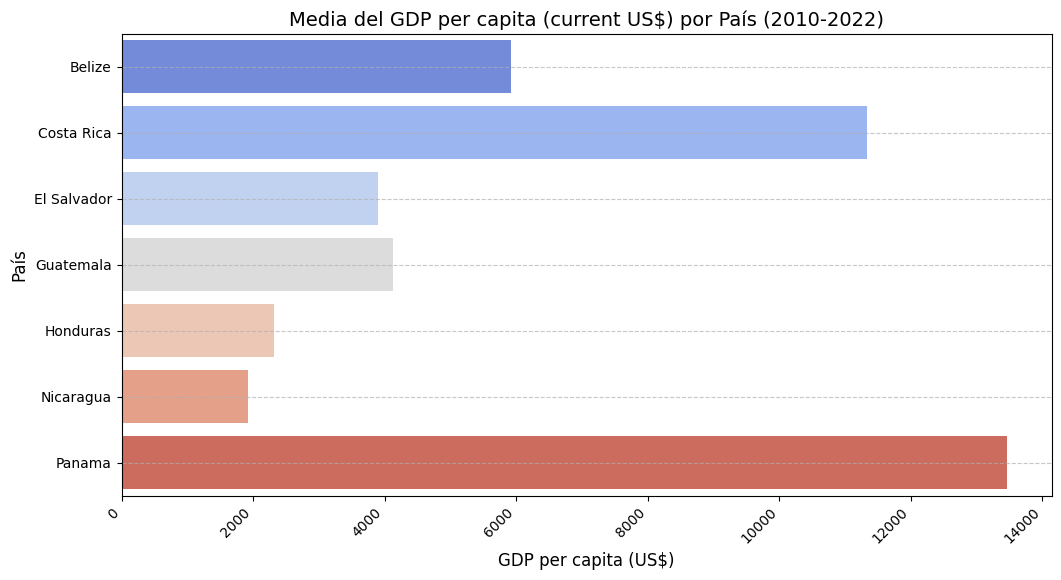

In [124]:
dfGPD_media = dfGPD.groupby('País').mean().mean(axis=1)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.barplot(y=dfGPD_media.index, x=dfGPD_media.values, palette='coolwarm')

plt.title('Media del GDP per capita (current US$) por País (2010-2022)', fontsize=14)
plt.ylabel('País', fontsize=12)
plt.xlabel('GDP per capita (US$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.show()

-Indicador: Industry (including construction), value added (% of GDP)

Se refiere al poncentaje del PIB que aporta el ramo de la industria en general y la construcción a un país

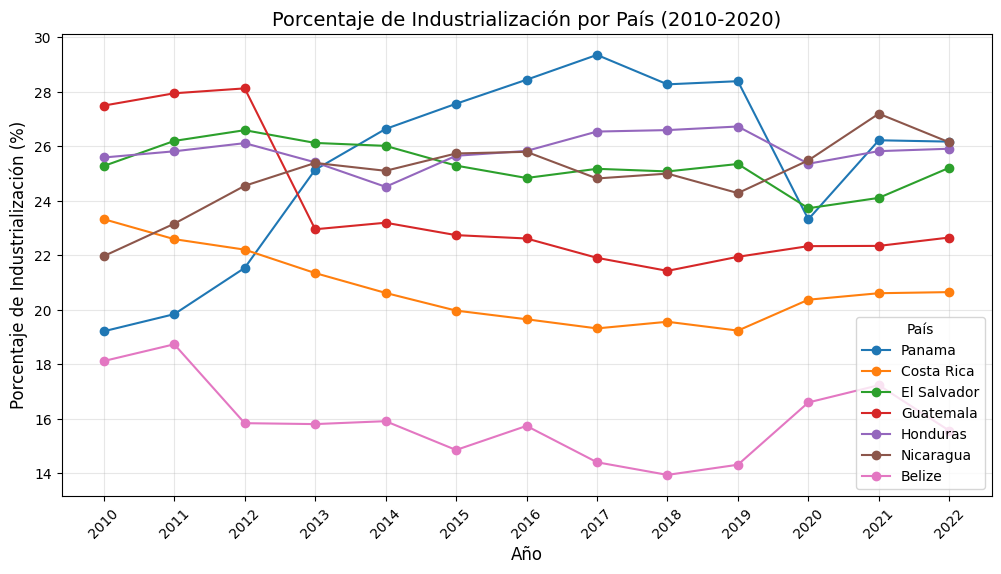

In [ ]:
# Filtrar por un indicador específico
dfIndustry = df[df['Indicador'] == "Industry (including construction), value added (% of GDP)"]

# Convertir columnas a numérico y calcular la media por país
dfIndustry.iloc[:, 2:] = dfIndustry.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
# eliminar la columna indicador
dfIndustry = dfIndustry.drop(columns=['Indicador'])
# elegimos la columna "País" como index y eliminamos la columna "País"
dfIndustry.set_index('País', inplace=True)
#dfIndustry

plt.figure(figsize=(12, 6))

for pais in dfIndustry.index:
    plt.plot(dfIndustry.columns, dfIndustry.loc[pais], marker='o', label=pais)

plt.title('Porcentaje de Industrialización por País (2010-2022)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje de Industrialización (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(alpha=0.3)
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_23024\1206187062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dfIndustry_media.index, x=dfIndustry_media.values, palette='coolwarm')


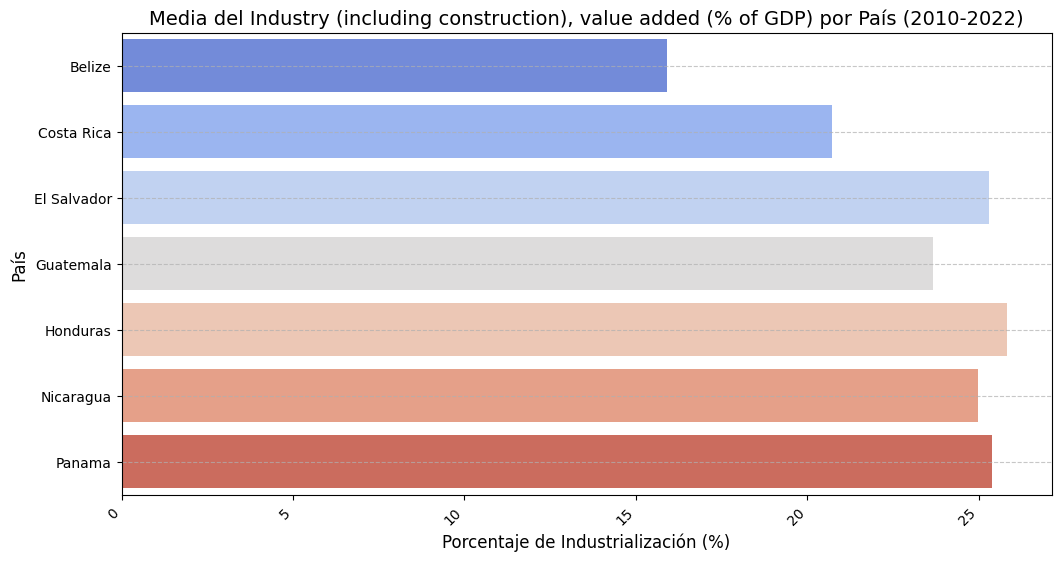

In [127]:
dfIndustry_media = dfIndustry.groupby('País').mean().mean(axis=1)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.barplot(y=dfIndustry_media.index, x=dfIndustry_media.values, palette='coolwarm')

plt.title('Media del Industry (including construction), value added (% of GDP) por País (2010-2022)', fontsize=14)
plt.ylabel('País', fontsize=12)
plt.xlabel('Porcentaje de Industrialización (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Maria Jose

### Karen
- Indicador: 'Net migration'

In [99]:
# seleccionar las filas que contienen el indicador "Net migration"
dfNetMigration = df[df['Indicador'].str.contains('Net migration')]
# eliminar la columna indicador
dfNetMigration = dfNetMigration.drop(columns=['Indicador'])
# elegimos la columna "País" como index y eliminamos la columna "País"
dfNetMigration.set_index('País', inplace=True)
# mostramos los datos
dfNetMigration

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,4953,5167,5447.0,5926,7105.0,8648,10109,11059,11130,10623,5473,5473,7967
Costa Rica,4728,4258,3983.0,3950,3996.0,4065,4150,4196,4198,4154,2084,2084,3850
El Salvador,-54686,-53440,-50554.0,-49086,-49130.0,-51282,-47499,-50616,-54158,-55143,-25214,-27343,-23249
Guatemala,-36072,-33204,-32572.0,-35666,-40409.0,-48162,-39266,-48049,-56884,-58095,-23142,-29118,-9128
Honduras,-5418,-5664,-5896.0,-6094,-6302.0,-6512,-6685,-6782,-6768,-6550,-6199,-5779,-5374
Nicaragua,-29081,-28224,-27388.0,-26589,-25571.0,-24359,-23081,-21841,-20739,-19733,-10384,-10384,-8000
Belize,1644,1583,1529.0,1504,1452.0,1363,1283,1222,1185,1164,0,577,600


In [100]:
#convertir los datos de tipo objeto a tipo float
dfNetMigration = dfNetMigration.astype(float)
dfNetMigration

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,
Panama,4953.0,5167.0,5447.0,5926.0,7105.0,8648.0,10109.0,11059.0,11130.0,10623.0,5473.0,5473.0,7967.0
Costa Rica,4728.0,4258.0,3983.0,3950.0,3996.0,4065.0,4150.0,4196.0,4198.0,4154.0,2084.0,2084.0,3850.0
El Salvador,-54686.0,-53440.0,-50554.0,-49086.0,-49130.0,-51282.0,-47499.0,-50616.0,-54158.0,-55143.0,-25214.0,-27343.0,-23249.0
Guatemala,-36072.0,-33204.0,-32572.0,-35666.0,-40409.0,-48162.0,-39266.0,-48049.0,-56884.0,-58095.0,-23142.0,-29118.0,-9128.0
Honduras,-5418.0,-5664.0,-5896.0,-6094.0,-6302.0,-6512.0,-6685.0,-6782.0,-6768.0,-6550.0,-6199.0,-5779.0,-5374.0
Nicaragua,-29081.0,-28224.0,-27388.0,-26589.0,-25571.0,-24359.0,-23081.0,-21841.0,-20739.0,-19733.0,-10384.0,-10384.0,-8000.0
Belize,1644.0,1583.0,1529.0,1504.0,1452.0,1363.0,1283.0,1222.0,1185.0,1164.0,0.0,577.0,600.0


In [101]:
#cambiar filas por columnas de un dataframe
dfNetMigration.T

País,Panama,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Belize
2010,4953.0,4728.0,-54686.0,-36072.0,-5418.0,-29081.0,1644.0
2011,5167.0,4258.0,-53440.0,-33204.0,-5664.0,-28224.0,1583.0
2012,5447.0,3983.0,-50554.0,-32572.0,-5896.0,-27388.0,1529.0
2013,5926.0,3950.0,-49086.0,-35666.0,-6094.0,-26589.0,1504.0
2014,7105.0,3996.0,-49130.0,-40409.0,-6302.0,-25571.0,1452.0
2015,8648.0,4065.0,-51282.0,-48162.0,-6512.0,-24359.0,1363.0
2016,10109.0,4150.0,-47499.0,-39266.0,-6685.0,-23081.0,1283.0
2017,11059.0,4196.0,-50616.0,-48049.0,-6782.0,-21841.0,1222.0
2018,11130.0,4198.0,-54158.0,-56884.0,-6768.0,-20739.0,1185.0
2019,10623.0,4154.0,-55143.0,-58095.0,-6550.0,-19733.0,1164.0


<Axes: title={'center': 'Mean Net Migration'}, xlabel='País', ylabel='Net Migration Mean'>

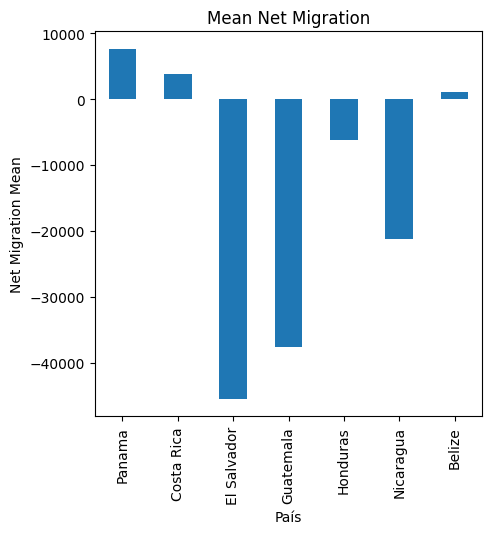

In [102]:
import matplotlib.pyplot as plt
dfNetMigMean = dfNetMigration.T.mean() #cambiamos filas por columnas y calculamos la media de cada país
#grafico de barras
dfNetMigMean.plot(kind='bar', title='Mean Net Migration', figsize=(5,5), xlabel='País', ylabel='Net Migration Mean')

<Axes: >

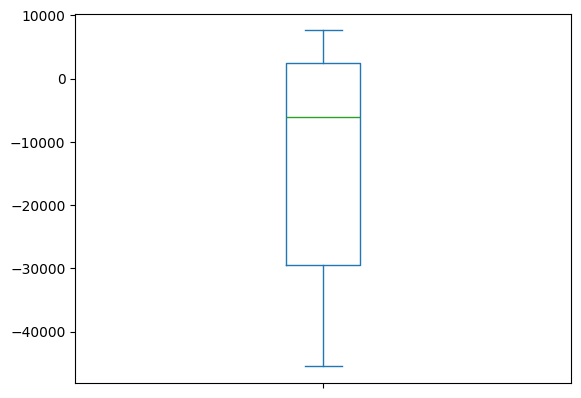

In [103]:
#grafico de caja
dfNetMigMean.plot(kind='box') 

<Axes: ylabel='Frequency'>

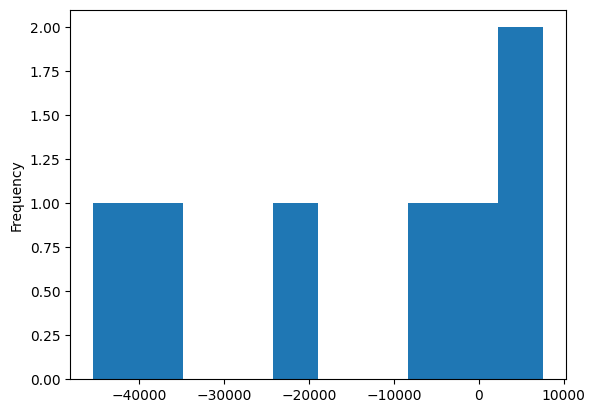

In [104]:
#Histograma
dfNetMigMean.plot(kind='hist') 

- 	'People using at least basic sanitation services (% of population)'

- 'Population density (people per sq. km of land area)'